# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import dataset
data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Module - 3 Machine Learning /Project/Classification Project/Bank Marketing Effectiveness Prediction/Data/bank-full.csv",sep=";")

##Data Inspection

In [ ]:
#Top 5 entry of dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Bottom 5 entry of dataset
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
#Shape of dataset (Row,Column)
data.shape

(45211, 17)

In [ ]:
#Basic information about dataset like null values , datatype , number of rows & column etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Describe the dataset with mean , max , count , unique and many more infomation
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
#Check null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no null values in dataset

##Exploratory Data Analysis(EDA)

In [ ]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

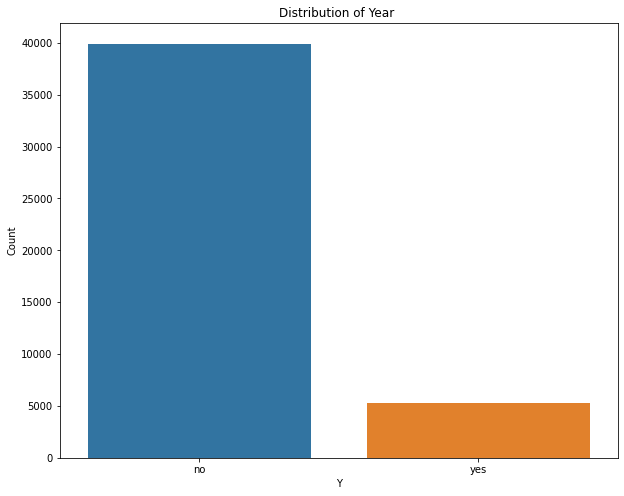

In [ ]:
#Count plot of dependent column y
plt.figure(figsize=(10,8))
sns.countplot(x = data.y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title("Distribution of Y ")
plt.show()

In [ ]:
categorical_feature = ['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'contact' , 'day' ,'month' , 'poutcome']

In [ ]:
continuous_feature = ['age' , 'balance' ,'duration' , 'campaign' , 'pdays' , 'previous']

Column name :  job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


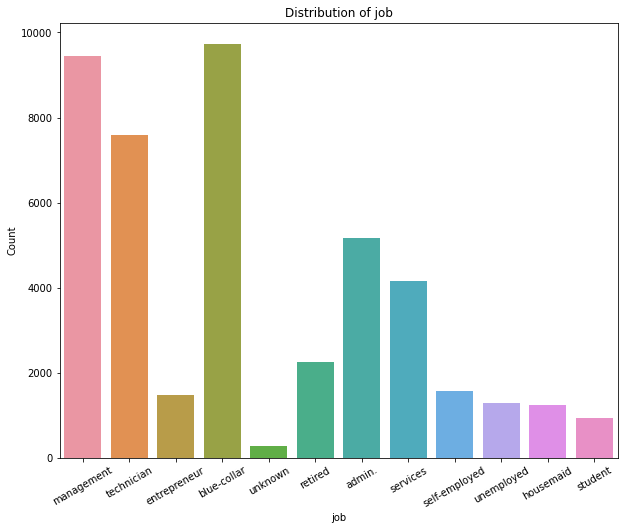

Column name :  marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


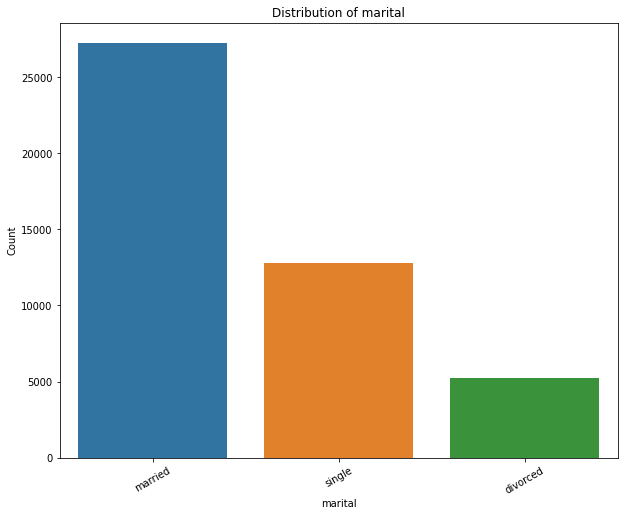

Column name :  education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


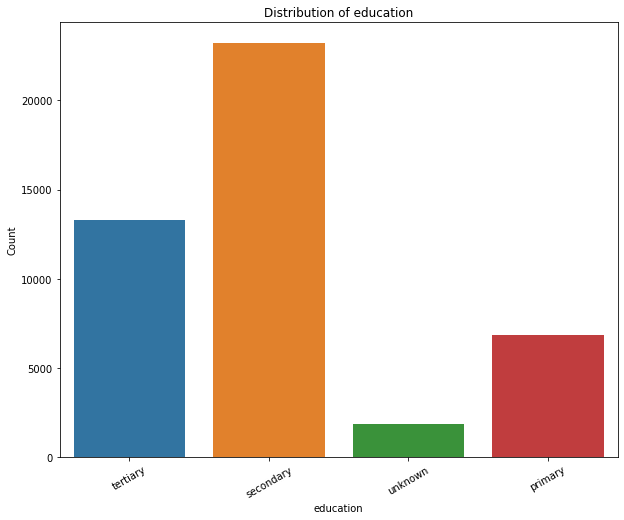

Column name :  default
no     44396
yes      815
Name: default, dtype: int64


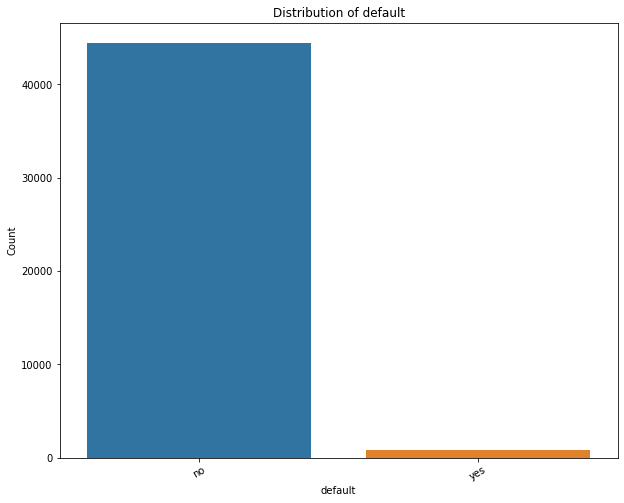

Column name :  housing
yes    25130
no     20081
Name: housing, dtype: int64


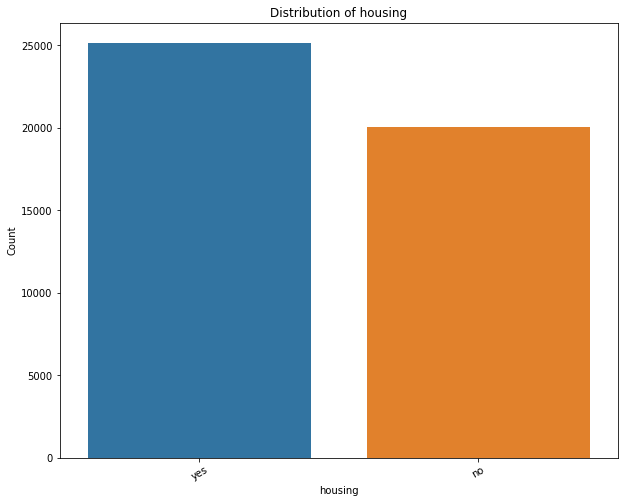

Column name :  loan
no     37967
yes     7244
Name: loan, dtype: int64


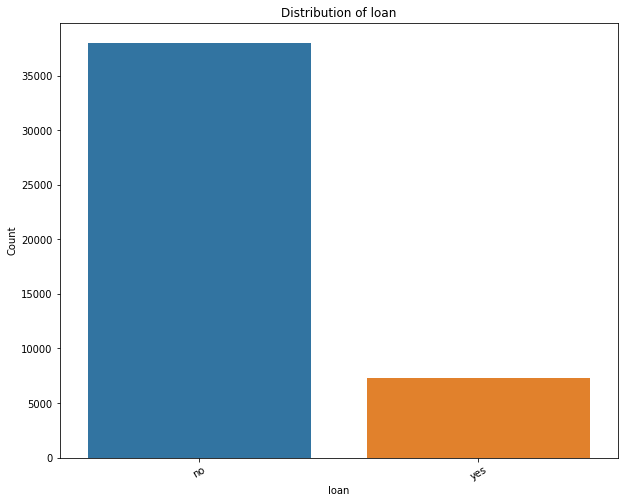

Column name :  contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


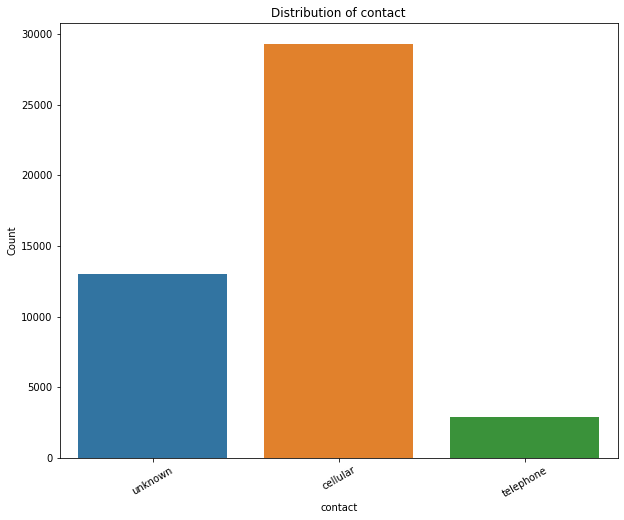

Column name :  day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64


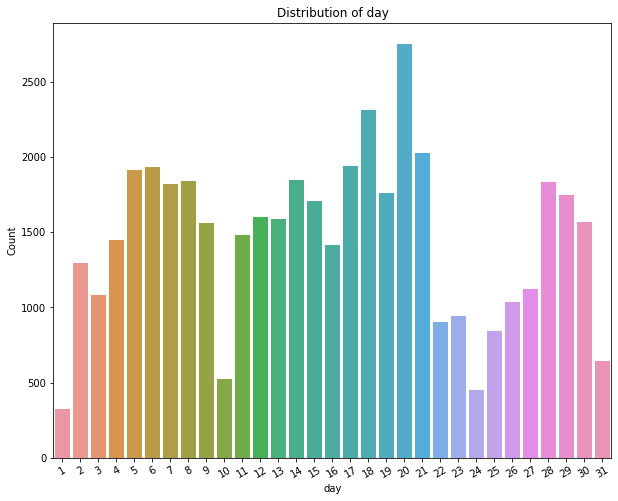

Column name :  month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


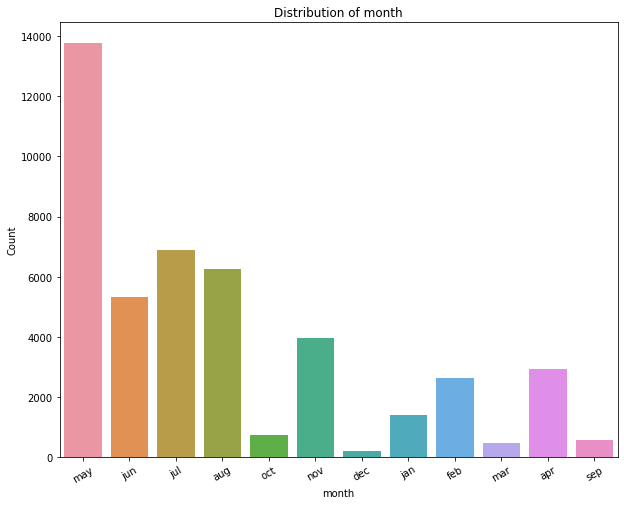

Column name :  poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


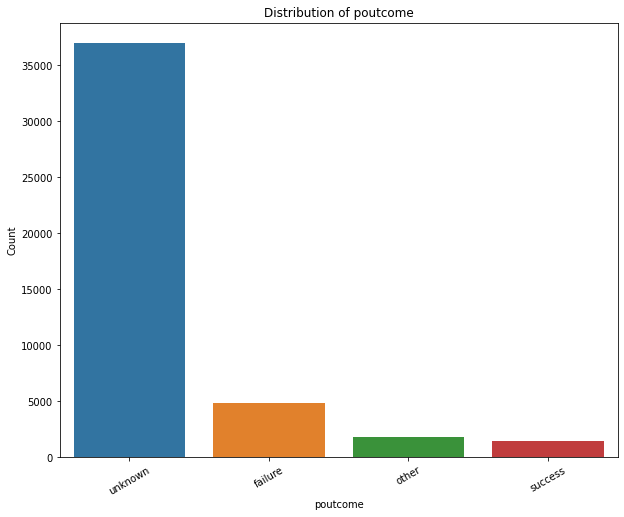

In [ ]:
#Countplot of categorical features
for col in categorical_feature:
  print('Column name : ' , col)
  print(data[col].value_counts())
  plt.figure(figsize=(10,8))
  sns.countplot(x = data[col])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title("Distribution of {}".format(col))
  plt.xticks(rotation=30)
  plt.show()

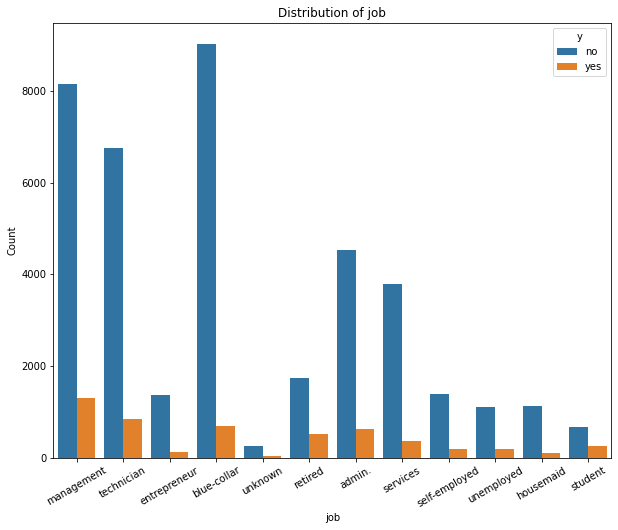

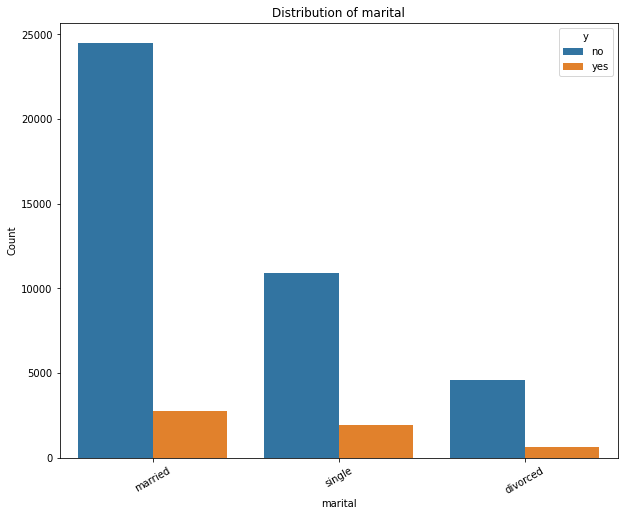

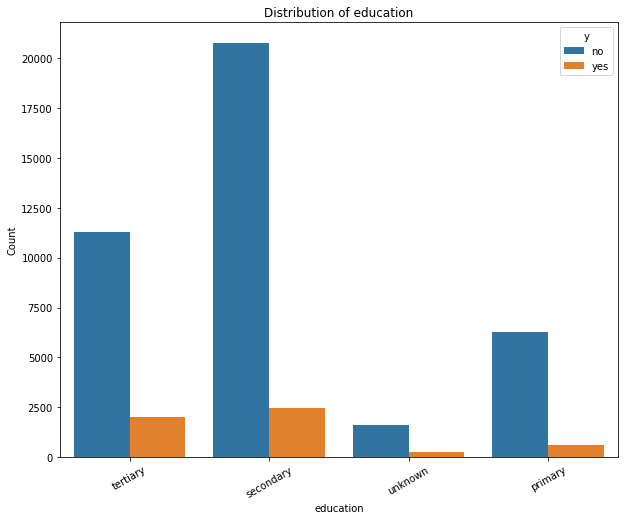

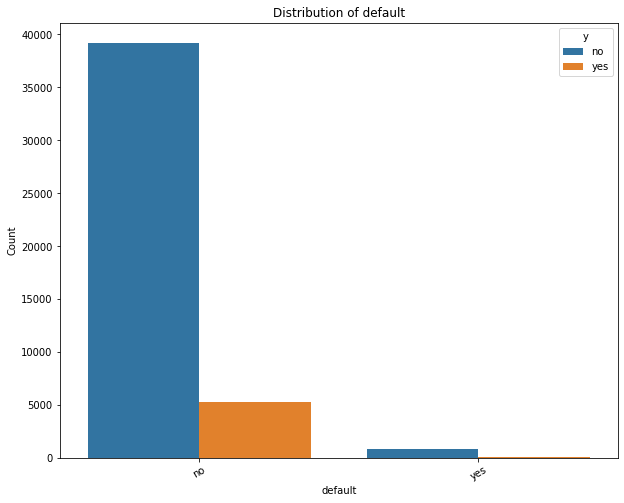

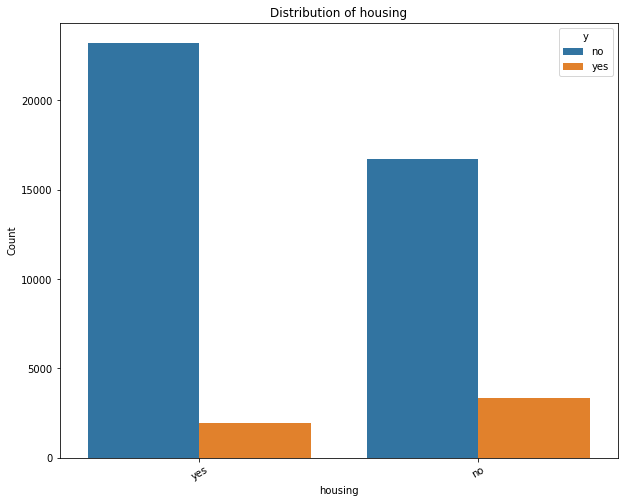

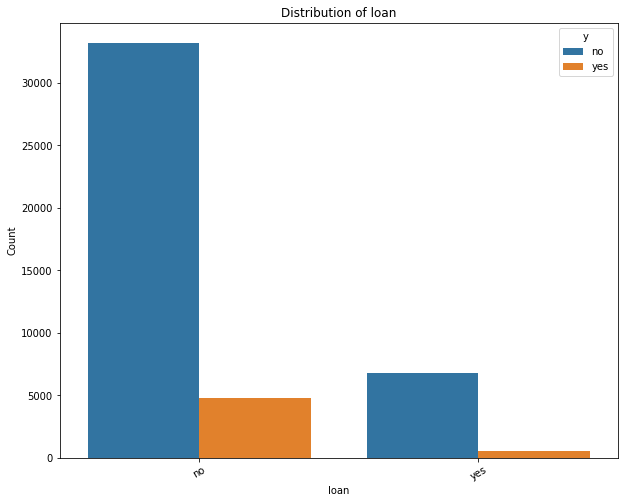

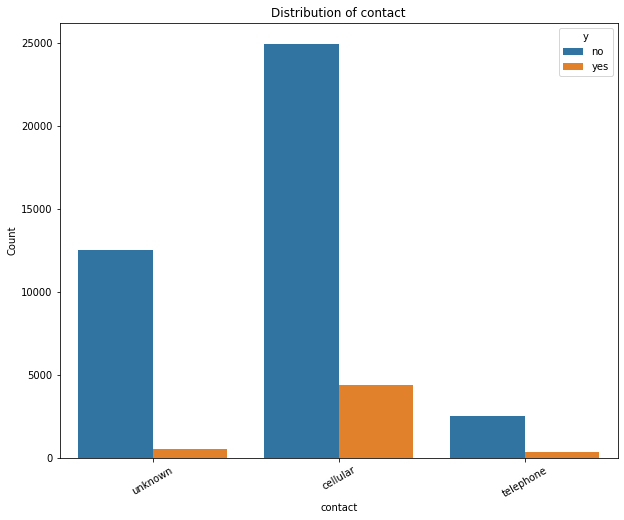

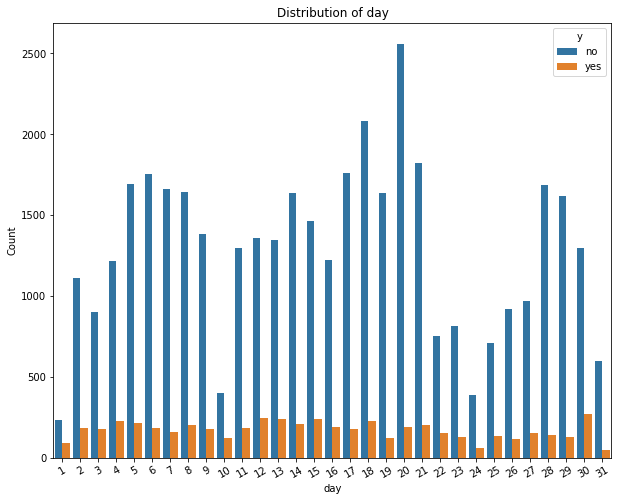

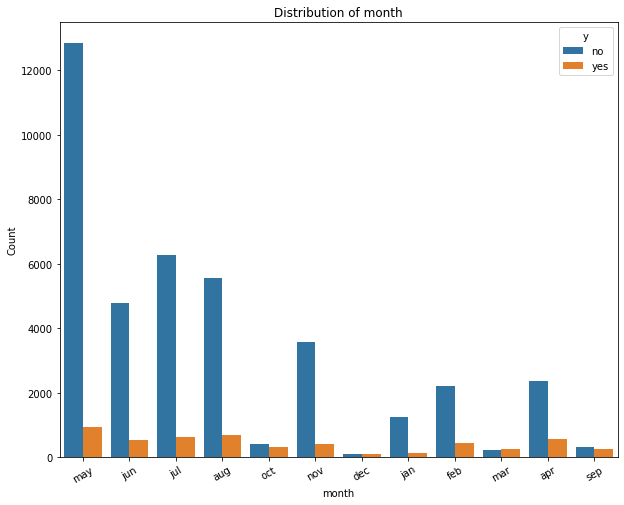

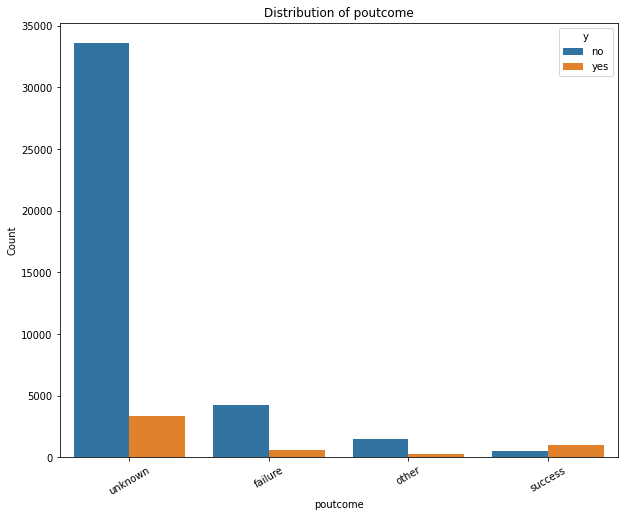

In [ ]:
#Countplot of categorical features
for col in categorical_feature:
  plt.figure(figsize=(10,8))
  sns.countplot(x = data[col] , hue=data['y'])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title("Distribution of {}".format(col))
  plt.xticks(rotation=30)
  plt.show()

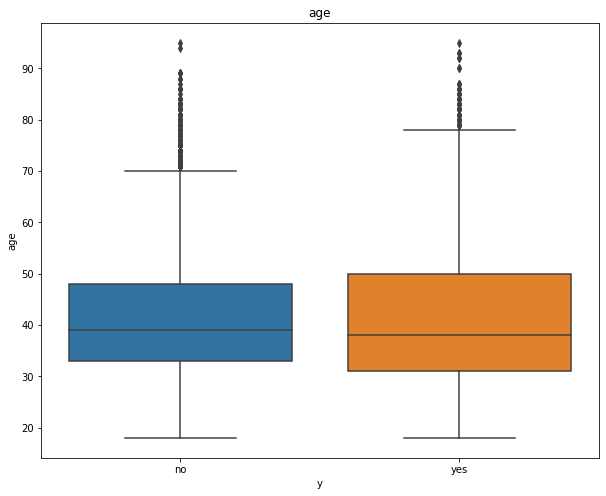

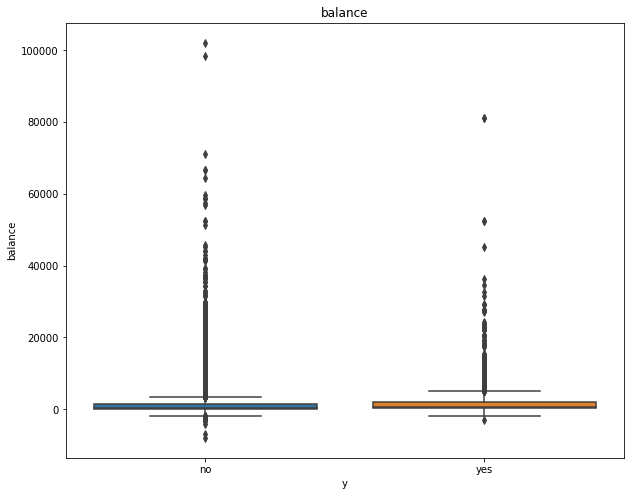

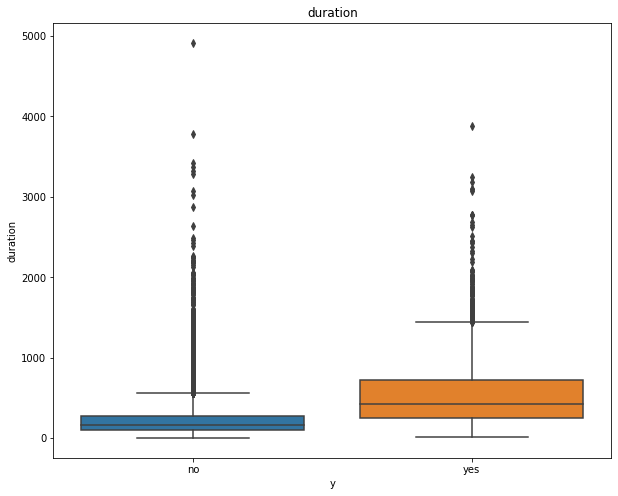

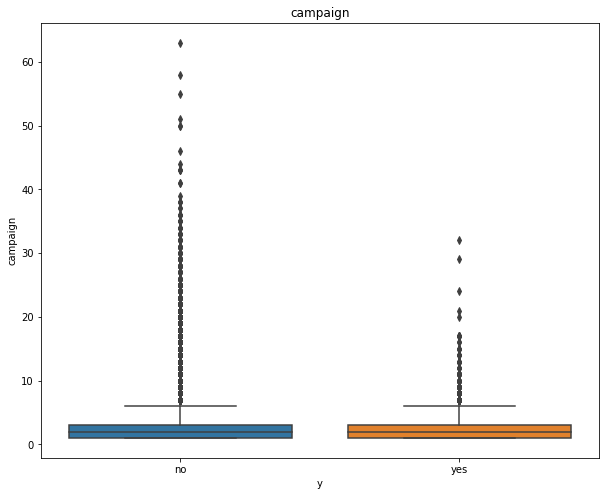

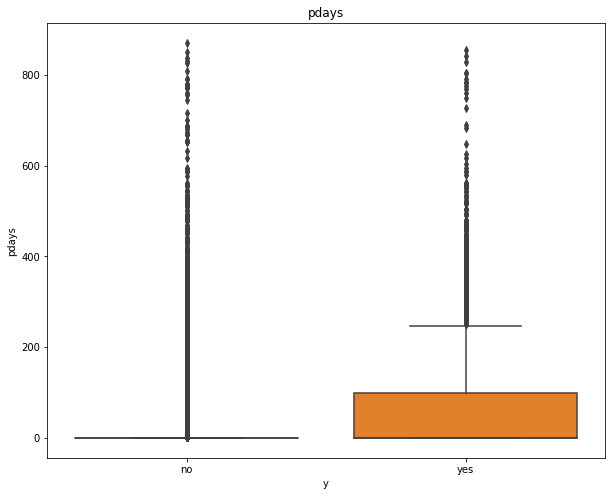

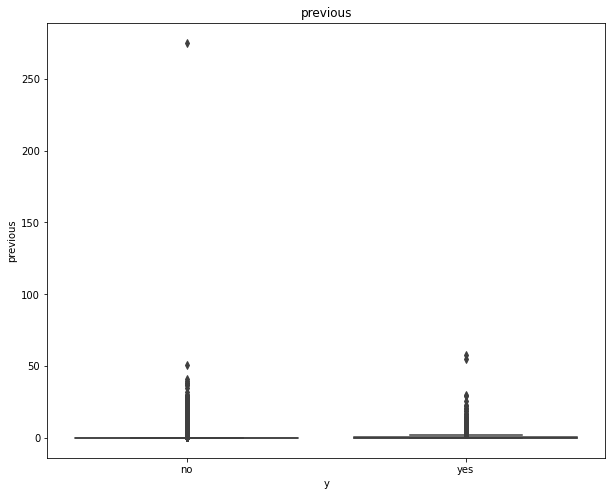

In [ ]:
#Bar plot of continuous feature
for col in continuous_feature:
  plt.figure(figsize=(10,8))
  sns.boxplot(data=data, x="y", y=col)
  plt.title(col)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


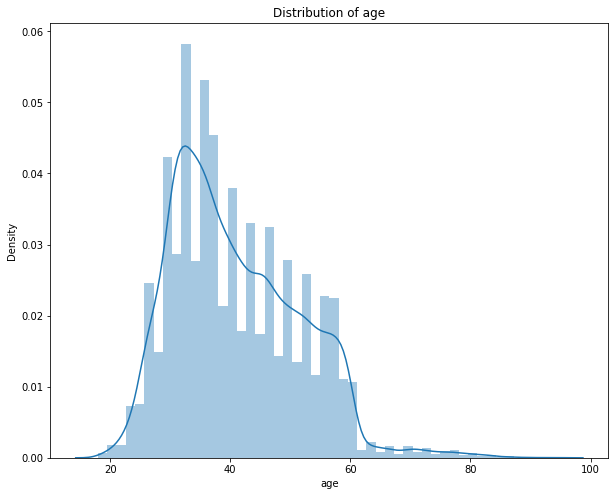

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


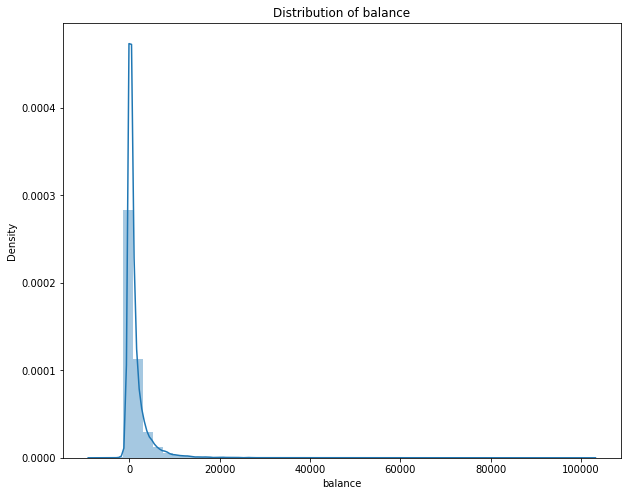

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


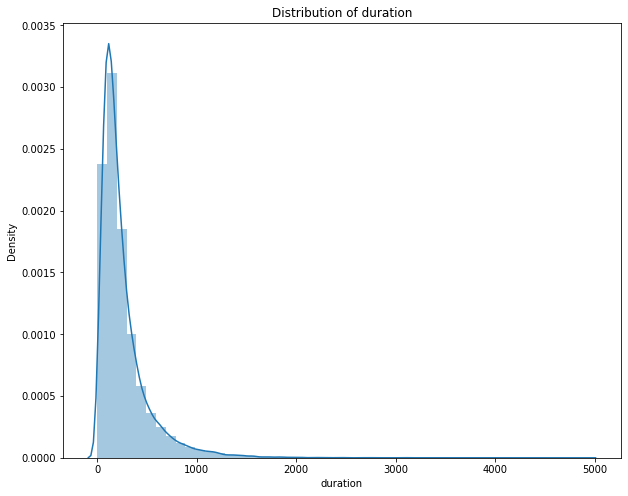

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


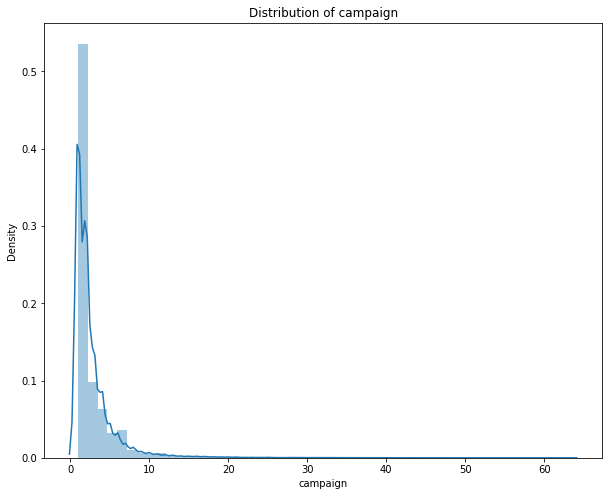

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


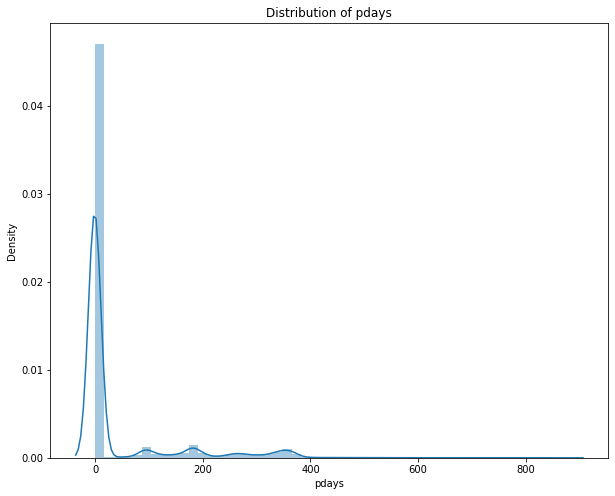

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


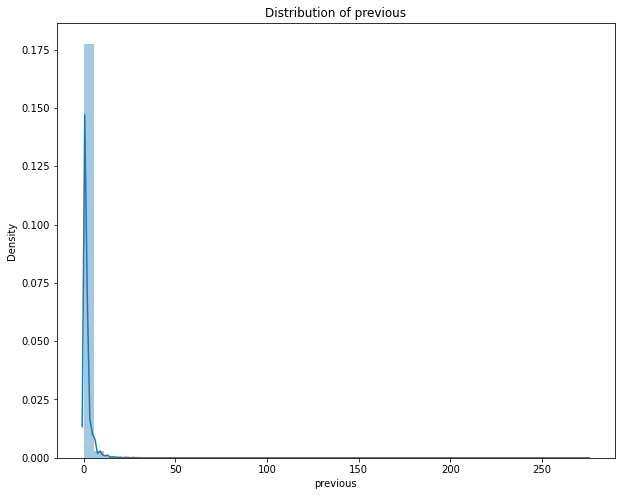

In [ ]:
#Distribution plot of continuous feature
for col in continuous_feature:
  plt.figure(figsize=(10,8))
  sns.distplot(data[col])
  plt.title("Distribution of {}".format(col))
  plt.show()

In [ ]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


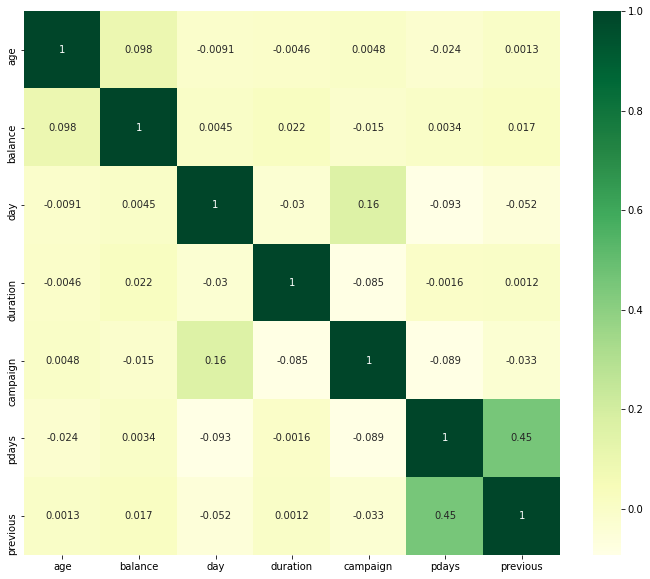

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True , cmap="YlGn")

In [ ]:
#Convert pday into binary 
def pdays_contact(days):
  if days == -1:
    return 0
  else:
    return 1

In [ ]:
data['is_contacted_bef'] = data['pdays'].apply(pdays_contact)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,is_contacted_bef
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [ ]:
#Apply OneHotEncoding on categorical features (job , marital , education , default , housing , loan , contact , potcome , y)
data = pd.get_dummies(data, columns=["job", "marital","education",'default','housing','loan','contact','poutcome','y'], prefix=["job", "marital","education",'default','housing','loan','contact','poutcome','y'],drop_first=True)

In [ ]:
data.head()

,age,balance,day,month,duration,campaign,pdays,previous,is_contacted_bef,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,may,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,44,29,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,33,2,5,may,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
3,47,1506,5,may,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,33,1,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
#Drop date , duration , age & day column column because they are not important
data.drop(['month','duration','age','day'],axis=1,inplace=True)

In [ ]:
data.head()

,balance,campaign,pdays,previous,is_contacted_bef,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,2143,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,29,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,2,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
3,1506,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
#Remove the outlier using IsolationForest technique
features = data.drop(['y_yes'],axis=1)
from sklearn.ensemble import IsolationForest
anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(features))
data['is_anomaly'] = anomalies
data = data[data['is_anomaly']==1].drop(['is_anomaly'],axis=1)

In [ ]:
data.shape

(40690, 30)

In [ ]:
#Assigning values to independent variables
X = data.drop('y_yes',axis=1)
X.head()

,balance,campaign,pdays,previous,is_contacted_bef,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,2143,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
1,29,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
2,2,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1
3,1506,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
5,231,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
#Assigning values to dependent variables
y = data['y_yes']
y.head()

0    0
1    0
2    0
3    0
5    0
Name: y_yes, dtype: uint8

In [ ]:
#Over sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(X.values,y.values)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X.shape

(73116, 29)

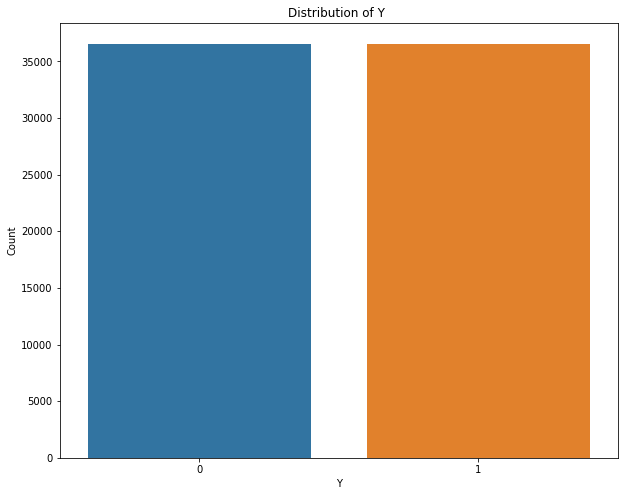

In [ ]:
#Count plot of dependent column y
plt.figure(figsize=(10,8))
sns.countplot(x = y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title("Distribution of Y ")
plt.show()

In [ ]:
#Scale the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
#Splitting data into train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(54837, 29) (54837,)
(18279, 29) (18279,)


##Logistic Regression

In [ ]:
#Fitting model to logistic regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(fit_intercept=True, max_iter=10000)
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Get the model coefficients
log_model.coef_

array([[-0.00721719, -0.44964097, -0.1056984 , -0.02657873, -1.26668642,
        -0.93859488, -0.42283266, -0.52627205, -0.81741271, -0.44370609,
        -0.44536729, -0.59843841, -0.20761386, -0.74461412, -0.43305044,
        -0.19654848, -0.75093433, -0.58524557, -0.79112221, -0.51158342,
        -0.31510929, -0.09910853, -0.5700879 , -0.41848765, -0.24039963,
        -0.80261733, -0.09536325,  0.21315235, -1.40729136]])

In [ ]:
#Get the model intercept
log_model.intercept_

array([0.09897829])

In [ ]:
#Get the predicted probabilities
train_preds = log_model.predict_proba(X_train)
test_preds = log_model.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = log_model.predict(X_train)
test_class_preds = log_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8640151722377227
The accuracy on test data is  0.8633404453197658


[[24463  2935]
 [ 4522 22917]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

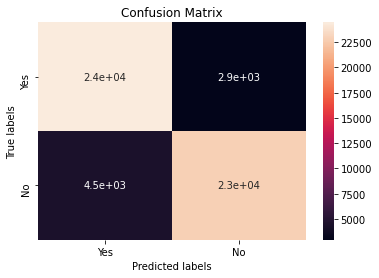

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8177  983]
 [1515 7604]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

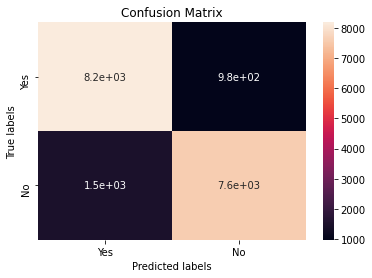

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
log_train_preds = log_model.predict_proba(X_train)[:,1]
log_test_preds = log_model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score
print('Train ROC-AUC score : ', roc_auc_score(y_train,log_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,log_test_preds))

Train ROC-AUC score :  0.9338308242968885
Test ROC-AUC score :  0.9326935854454277


In [ ]:
from sklearn.metrics import classification_report
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.84      0.87     28985
          no       0.84      0.89      0.86     25852

    accuracy                           0.86     54837
   macro avg       0.86      0.87      0.86     54837
weighted avg       0.87      0.86      0.86     54837



In [ ]:
from sklearn.metrics import classification_report
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.84      0.87      9692
          no       0.83      0.89      0.86      8587

    accuracy                           0.86     18279
   macro avg       0.86      0.86      0.86     18279
weighted avg       0.87      0.86      0.86     18279



In [ ]:
#Hyperprarameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
log_grid = LogisticRegression()
parameters = {'C': [1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,100,1e-3,1e+4,1e+5,1e+6]}
log_grid = GridSearchCV(log_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=1e-05 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ......................................... C=0.0001, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   21.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5,
                               10, 100, 0.001, 10000.0, 100000.0, 1000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [ ]:
log_grid.best_params_

{'C': 0.1}

In [ ]:
log_grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_optimal_model = log_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds = log_optimal_model.predict(X_train)
test_class_preds = log_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", log_train_accuracy)
print("The accuracy on test dataset is", log_test_accuracy)

The accuracy on train dataset is 0.8641245874136076
The accuracy on test dataset is 0.8636686908474205


[[24462  2936]
 [ 4515 22924]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

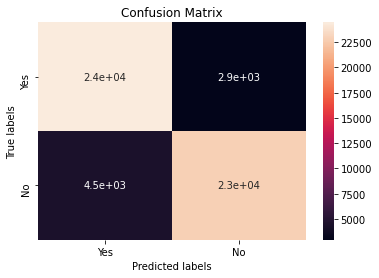

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8180  980]
 [1512 7607]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

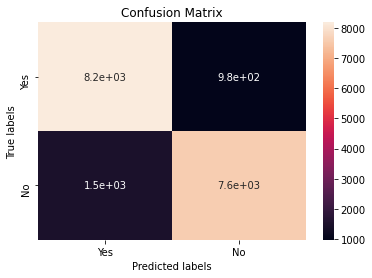

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
log_optimal_train_preds = log_optimal_model.predict_proba(X_train)[:,1]
log_optimal_test_preds = log_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,log_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,log_optimal_test_preds))

Train ROC-AUC score :  0.933830953325075
Test ROC-AUC score :  0.9326844988940506


In [ ]:
from sklearn.metrics import classification_report
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.84      0.87     28977
          no       0.84      0.89      0.86     25860

    accuracy                           0.86     54837
   macro avg       0.86      0.87      0.86     54837
weighted avg       0.87      0.86      0.86     54837



In [ ]:
from sklearn.metrics import classification_report
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.84      0.87      9692
          no       0.83      0.89      0.86      8587

    accuracy                           0.86     18279
   macro avg       0.86      0.86      0.86     18279
weighted avg       0.87      0.86      0.86     18279



##K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Setup a knn classifier with k neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_model.score(X_test,y_test)

0.8860988019038241

In [ ]:
train_class_preds = knn_model.predict(X_train)
test_class_preds = knn_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.92691066250889
The accuracy on test data is  0.8860988019038241


[[25500  1898]
 [ 2110 25329]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

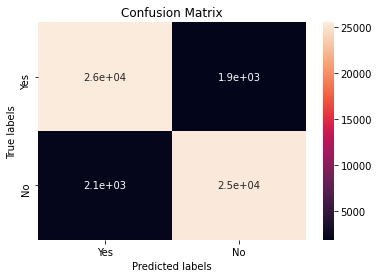

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8102 1058]
 [1024 8095]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

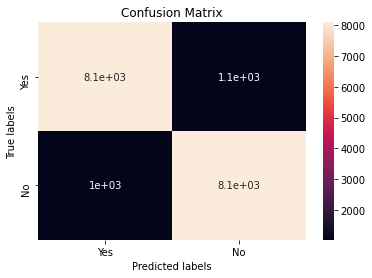

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
knn_train_preds = knn_model.predict_proba(X_train)[:,1]
knn_test_preds = knn_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,knn_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,knn_test_preds))

Train ROC-AUC score :  0.9818453464112968
Test ROC-AUC score :  0.9211422800707387


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.93      0.92      0.93     27610
          no       0.92      0.93      0.93     27227

    accuracy                           0.93     54837
   macro avg       0.93      0.93      0.93     54837
weighted avg       0.93      0.93      0.93     54837



In [ ]:
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      0.89      0.89      9126
          no       0.89      0.88      0.89      9153

    accuracy                           0.89     18279
   macro avg       0.89      0.89      0.89     18279
weighted avg       0.89      0.89      0.89     18279



In [ ]:
#Hyperprarameter tuning using GridSearchCV

knn_grid = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,50,2)}
knn_grid = GridSearchCV(knn_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
knn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   5.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   5.1s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   5.4s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   5.3s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   5.5s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   6.8s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   7.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   7.2s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 25.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [ ]:
knn_grid.best_params_

{'n_neighbors': 27}

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [ ]:
knn_optimal_model = knn_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds = knn_optimal_model.predict(X_train)
test_class_preds = knn_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
knn_train_accuracy = accuracy_score(y_train,train_class_preds)
knn_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", knn_train_accuracy)
print("The accuracy on test dataset is", knn_test_accuracy)

The accuracy on train dataset is 0.8801721465433923
The accuracy on test dataset is 0.8739537173806007


[[24982  2416]
 [ 4155 23284]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

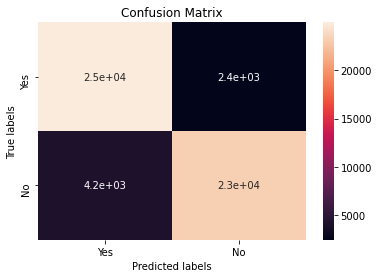

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8285  875]
 [1429 7690]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

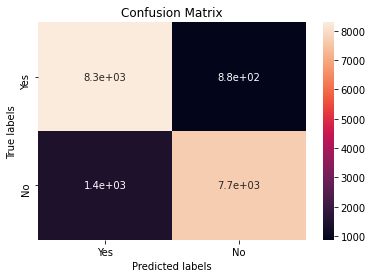

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
knn_optimal_train_preds = knn_optimal_model.predict_proba(X_train)[:,1]
knn_optimal_test_preds = knn_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,knn_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,knn_optimal_test_preds))

Train ROC-AUC score :  0.9509518244374069
Test ROC-AUC score :  0.9375267628268823


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.91      0.86      0.88     29137
          no       0.85      0.91      0.88     25700

    accuracy                           0.88     54837
   macro avg       0.88      0.88      0.88     54837
weighted avg       0.88      0.88      0.88     54837



In [ ]:
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.90      0.85      0.88      9714
          no       0.84      0.90      0.87      8565

    accuracy                           0.87     18279
   macro avg       0.87      0.88      0.87     18279
weighted avg       0.88      0.87      0.87     18279



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Get the predicted classes
train_class_preds = tree_model.predict(X_train)
test_class_preds = tree_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9911373707533235
The accuracy on test data is  0.8815033645166584


[[27117   281]
 [  205 27234]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

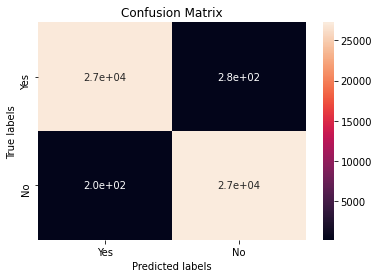

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7882 1278]
 [ 888 8231]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

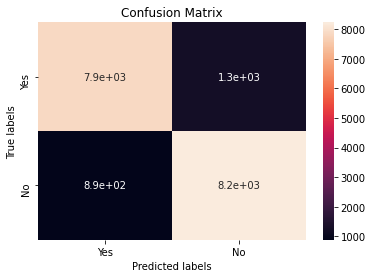

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
tree_train_preds = tree_model.predict_proba(X_train)[:,1]
tree_test_preds = tree_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,tree_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,tree_test_preds))

Train ROC-AUC score :  0.9997922054264089
Test ROC-AUC score :  0.8873993535738759


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.99      0.99      0.99     27322
          no       0.99      0.99      0.99     27515

    accuracy                           0.99     54837
   macro avg       0.99      0.99      0.99     54837
weighted avg       0.99      0.99      0.99     54837



In [ ]:
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.86      0.90      0.88      8770
          no       0.90      0.87      0.88      9509

    accuracy                           0.88     18279
   macro avg       0.88      0.88      0.88     18279
weighted avg       0.88      0.88      0.88     18279



In [ ]:
#Hyperprarameter tuning using GridSearchCV
tree_grid = DecisionTreeClassifier()
parameters = {
                'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]

}
tree_grid = GridSearchCV(tree_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=20 ..........
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   32.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10],
                         

In [ ]:
tree_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}

In [ ]:
tree_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_optimal_model = tree_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds = tree_optimal_model.predict(X_train)
test_class_preds = tree_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
tree_train_accuracy = accuracy_score(y_train,train_class_preds)
tree_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", tree_train_accuracy)
print("The accuracy on test dataset is", tree_test_accuracy)

The accuracy on train dataset is 0.8504294545653482
The accuracy on test dataset is 0.8422233163739811


[[23842  3556]
 [ 4646 22793]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

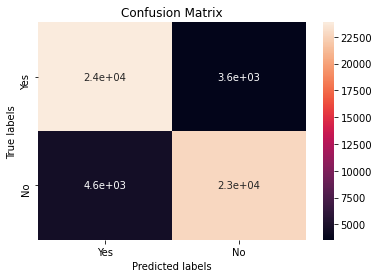

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7929 1231]
 [1653 7466]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

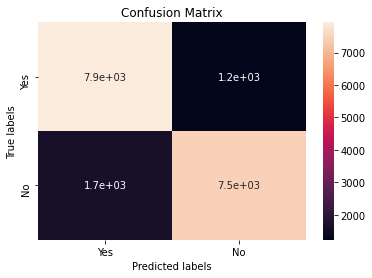

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
tree_optimal_train_preds = tree_optimal_model.predict_proba(X_train)[:,1]
tree_optimal_test_preds = tree_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,tree_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,tree_optimal_test_preds))

Train ROC-AUC score :  0.9246568909733719
Test ROC-AUC score :  0.9124327427593714


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.87      0.84      0.85     28488
          no       0.83      0.87      0.85     26349

    accuracy                           0.85     54837
   macro avg       0.85      0.85      0.85     54837
weighted avg       0.85      0.85      0.85     54837



In [ ]:
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.87      0.83      0.85      9582
          no       0.82      0.86      0.84      8697

    accuracy                           0.84     18279
   macro avg       0.84      0.84      0.84     18279
weighted avg       0.84      0.84      0.84     18279



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
features.columns

Index(['balance', 'campaign', 'pdays', 'previous', 'is_contacted_bef',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

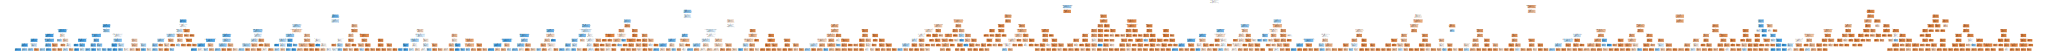

<Figure size 360x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
graph = Source(tree.export_graphviz(tree_optimal_model, out_file=None, feature_names=features.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
importances = tree_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df

,Feature,Feature Importance
0,balance,0.041324
1,campaign,0.058949
2,pdays,0.005746
3,previous,0.001156
4,is_contacted_bef,0.000334
5,job_blue-collar,0.033550
6,job_entrepreneur,0.004809
7,job_housemaid,0.009025
8,job_management,0.029104
9,job_retired,0.007544


In [ ]:
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
importance_gb_df

,Feature,Feature Importance
0,balance,0.04
1,campaign,0.06
2,pdays,0.01
3,previous,0.00
4,is_contacted_bef,0.00
5,job_blue-collar,0.03
6,job_entrepreneur,0.00
7,job_housemaid,0.01
8,job_management,0.03
9,job_retired,0.01


In [ ]:
fim_gb_df=importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
22,housing_yes,0.27
25,contact_unknown,0.16
17,marital_single,0.09
16,marital_married,0.08
1,campaign,0.06
18,education_secondary,0.05
0,balance,0.04
23,loan_yes,0.03
5,job_blue-collar,0.03
8,job_management,0.03


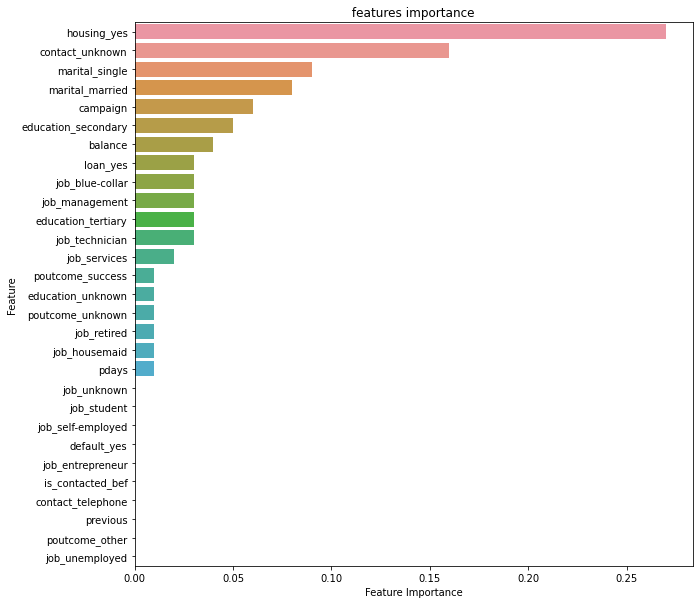

In [ ]:
plt.figure(figsize=(20,20))
plt.title(' features importance ')
sns.barplot(x='Feature Importance',y="Feature",data=fim_gb_df)

##RandomForest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Get the predicted classes
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9910644273027336
The accuracy on test data is  0.8917883910498386


[[27087   311]
 [  179 27260]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

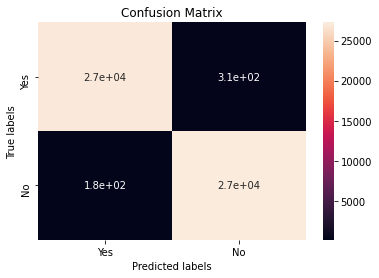

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8092 1068]
 [ 910 8209]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

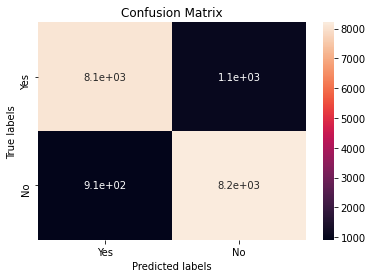

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
rf_train_preds = rf_model.predict_proba(X_train)[:,1]
rf_test_preds = rf_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,rf_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,rf_test_preds))

Train ROC-AUC score :  0.9991757326947377
Test ROC-AUC score :  0.9497302287895468


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.99      0.99      0.99     27266
          no       0.99      0.99      0.99     27571

    accuracy                           0.99     54837
   macro avg       0.99      0.99      0.99     54837
weighted avg       0.99      0.99      0.99     54837



In [ ]:
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      0.90      0.89      9002
          no       0.90      0.88      0.89      9277

    accuracy                           0.89     18279
   macro avg       0.89      0.89      0.89     18279
weighted avg       0.89      0.89      0.89     18279



In [ ]:
#Hyperprarameter tuning using GridSearchCV
rf_grid = RandomForestClassifier()
parameters = {
                'n_estimators' : [50,75,100],
                'max_depth' : [4,6,8,10],
                'min_samples_split' : [50,100,150],
                'min_samples_leaf' : [40,45,50]

}
rf_grid = GridSearchCV(rf_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   1.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 13.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 75}

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
rf_train_accuracy = accuracy_score(y_train,train_class_preds)
rf_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", rf_train_accuracy)
print("The accuracy on test dataset is", rf_test_accuracy)

The accuracy on train dataset is 0.852763644984226
The accuracy on test dataset is 0.8518518518518519


[[24154  3244]
 [ 4830 22609]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

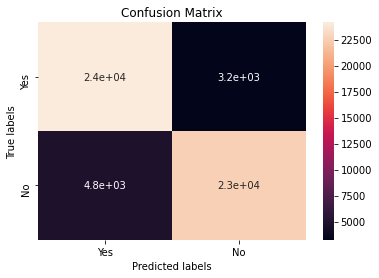

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8061 1099]
 [1609 7510]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

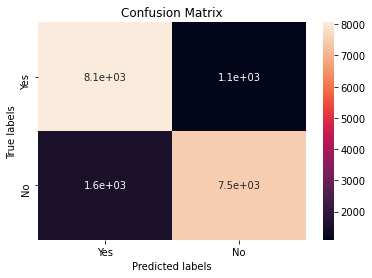

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
rf_optimal_train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
rf_optimal_test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,rf_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,rf_optimal_test_preds))

Train ROC-AUC score :  0.9253648054487331
Test ROC-AUC score :  0.9230029759353641


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      0.83      0.86     28984
          no       0.82      0.87      0.85     25853

    accuracy                           0.85     54837
   macro avg       0.85      0.85      0.85     54837
weighted avg       0.85      0.85      0.85     54837



In [ ]:
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      0.83      0.86      9670
          no       0.82      0.87      0.85      8609

    accuracy                           0.85     18279
   macro avg       0.85      0.85      0.85     18279
weighted avg       0.85      0.85      0.85     18279



In [ ]:
rf_model.feature_importances_

array([0.27391753, 0.05826845, 0.0265934 , 0.0100423 , 0.00288159,
       0.04860155, 0.01163245, 0.01658647, 0.03234774, 0.01425459,
       0.01386569, 0.02151223, 0.00473521, 0.03498493, 0.01398095,
       0.00297422, 0.05009901, 0.03345898, 0.03952747, 0.02856221,
       0.01064199, 0.00218414, 0.09318566, 0.02990292, 0.01227459,
       0.10274998, 0.00188409, 0.00354935, 0.00480032])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
new_df=importance_df.sort_values(by=['Feature Importance'],ascending=False)
new_df

,Feature,Feature Importance
0,balance,0.27
25,contact_unknown,0.10
22,housing_yes,0.09
1,campaign,0.06
5,job_blue-collar,0.05
16,marital_married,0.05
18,education_secondary,0.04
23,loan_yes,0.03
17,marital_single,0.03
19,education_tertiary,0.03


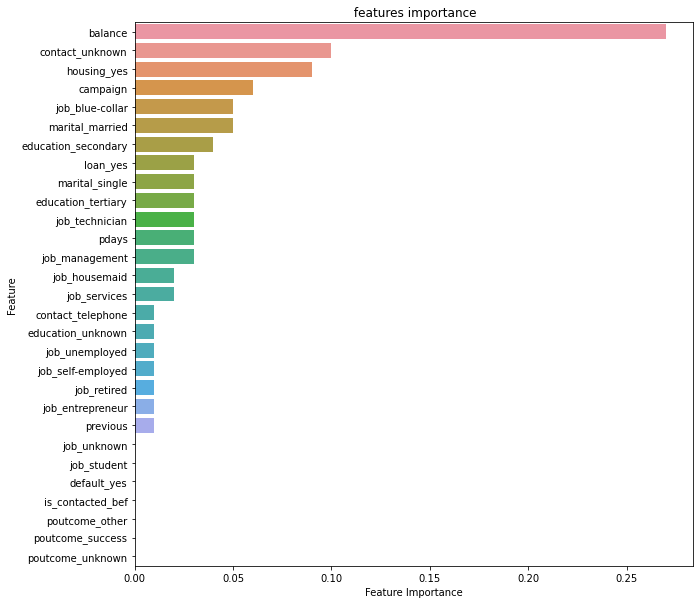

In [ ]:
plt.figure(figsize=(20,20))
plt.title(' features importance')
sns.barplot(x='Feature Importance',y="Feature",data=new_df)

##XGBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Get the predicted classes
train_class_preds = xgb_model.predict(X_train)
test_class_preds = xgb_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8676657353314706
The accuracy on test data is  0.8656940961932984


[[22557  3027]
 [ 3746 21851]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

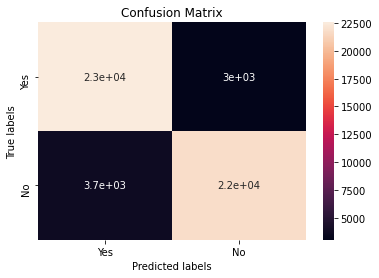

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[9650 1324]
 [1622 9339]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

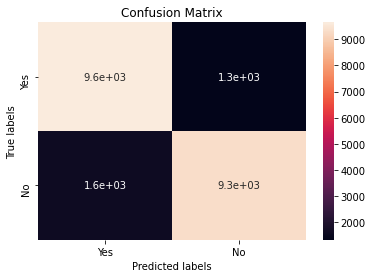

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
xgb_train_preds = xgb_model.predict_proba(X_train)[:,1]
xgb_test_preds = xgb_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,xgb_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,xgb_test_preds))

Train ROC-AUC score :  0.9377187292166015
Test ROC-AUC score :  0.9338008365627611


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      0.86      0.87     26303
          no       0.85      0.88      0.87     24878

    accuracy                           0.87     51181
   macro avg       0.87      0.87      0.87     51181
weighted avg       0.87      0.87      0.87     51181



In [ ]:
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.88      0.86      0.87     11272
          no       0.85      0.88      0.86     10663

    accuracy                           0.87     21935
   macro avg       0.87      0.87      0.87     21935
weighted avg       0.87      0.87      0.87     21935



In [ ]:
#Hyperprarameter tuning using GridSearchCV
xgb_grid = xgb.XGBClassifier()
parameters = {
                'n_estimators' : [50,80,100,125],
              'max_depth' : [3,5,7,9],
              'learning_rate': [0.01,0.1,0.3,0.5]
              }
xgb_grid = GridSearchCV(xgb_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] learning_rate=0.01, max_depth=3, n_estimators=50 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . learning_rate=0.01, max_depth=3, n_estimators=50, total=   1.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] . learning_rate=0.01, max_depth=3, n_estimators=50, total=   1.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50 ................
[CV] . learning_rate=0.01, max_depth=3, n_estimators=50, total=   1.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50 ................
[CV] . learning_rate=0.01, max_depth=3, n_estimators=50, total=   1.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=50 ................
[CV] . learning_rate=0.01, max_depth=3, n_estimators=50, total=   1.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=80 ................
[CV] . learning_rate=0.01, max_depth=3, n_estimators=80, total=   2.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=80 ................
[CV] . learning_rate=0.01, max_depth=3, n_estimators=80, total=   2.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=80 ................
[CV] . learning_rate=0.01, max_depth=3, n_estimators=80, total=   2.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=80 ................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 30.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 80, 100, 125]}

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 125}

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=125, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds = xgb_optimal_model.predict(X_train)
test_class_preds = xgb_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
xgb_train_accuracy = accuracy_score(y_train,train_class_preds)
xgb_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", xgb_train_accuracy)
print("The accuracy on test dataset is", xgb_test_accuracy)

The accuracy on train dataset is 0.9544752935659717
The accuracy on test dataset is 0.9052655573284705


[[24638   946]
 [ 1384 24213]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

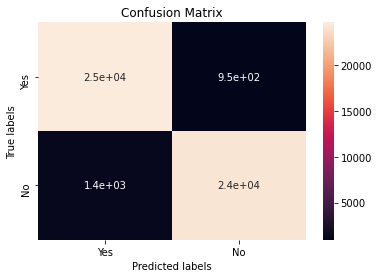

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[10079   895]
 [ 1183  9778]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

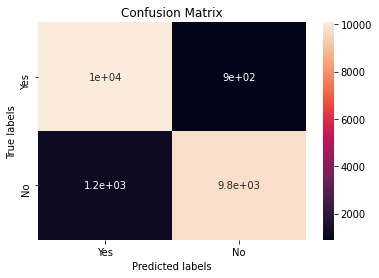

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
xgb_optimal_train_preds = xgb_optimal_model.predict_proba(X_train)[:,1]
xgb_optimal_test_preds = xgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,xgb_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,xgb_optimal_test_preds))

Train ROC-AUC score :  0.9917151132641087
Test ROC-AUC score :  0.9578190486884037


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.96      0.95      0.95     26022
          no       0.95      0.96      0.95     25159

    accuracy                           0.95     51181
   macro avg       0.95      0.95      0.95     51181
weighted avg       0.95      0.95      0.95     51181



In [ ]:
target_names = ['yes','no']
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.92      0.89      0.91     11262
          no       0.89      0.92      0.90     10673

    accuracy                           0.91     21935
   macro avg       0.91      0.91      0.91     21935
weighted avg       0.91      0.91      0.91     21935



In [ ]:
importances = xgb_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df

,Feature,Feature Importance
0,balance,0.003706
1,campaign,0.005807
2,pdays,0.003618
3,previous,0.002705
4,is_contacted_bef,0.009794
5,job_blue-collar,0.021330
6,job_entrepreneur,0.058870
7,job_housemaid,0.065292
8,job_management,0.021197
9,job_retired,0.025746


In [ ]:
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
importance_gb_df

,Feature,Feature Importance
0,balance,0.00
1,campaign,0.01
2,pdays,0.00
3,previous,0.00
4,is_contacted_bef,0.01
5,job_blue-collar,0.02
6,job_entrepreneur,0.06
7,job_housemaid,0.07
8,job_management,0.02
9,job_retired,0.03


In [ ]:
fim_gb_df=importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
28,poutcome_unknown,0.24
25,contact_unknown,0.11
7,job_housemaid,0.07
6,job_entrepreneur,0.06
14,job_unemployed,0.06
10,job_self-employed,0.05
11,job_services,0.04
22,housing_yes,0.04
24,contact_telephone,0.03
23,loan_yes,0.03


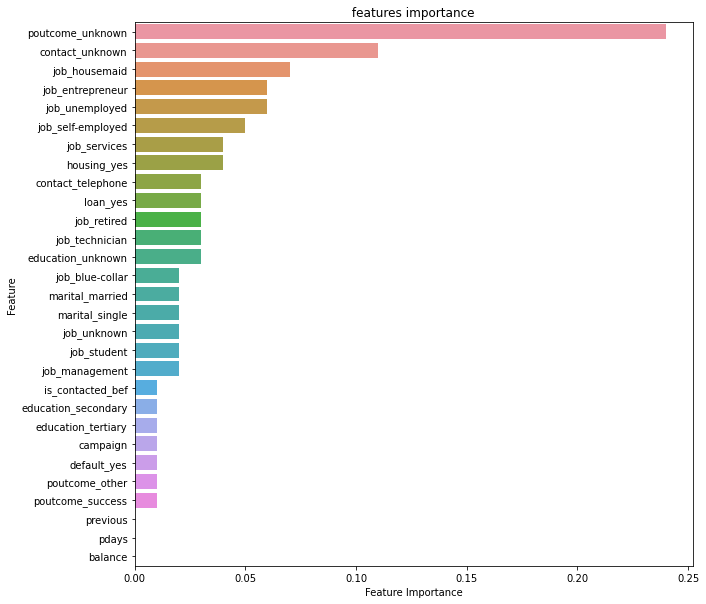

In [ ]:
plt.figure(figsize=(20,20))
plt.title(' features importance ')
sns.barplot(x='Feature Importance',y="Feature",data=fim_gb_df)

##Conclusion

For age , most of the customers are in the age range of 30-40.

For balance , above 1000$ is like to subscribe a term deposite .

Comparing to all algorithms XGboost algorithm has best accuracy score and ROC-AUC score . So it is concluded as optimal model.
